Installing BeautifulSoup and lxml for web scraping, geopy for co-ordinates, and folium for location maps.

In [3]:
import sys
!conda install --yes --prefix {sys.prefix} beautifulsoup4
!conda install --yes --prefix {sys.prefix} lxml
!conda install -c conda-forge geopy --yes
!conda install -c conda-forge folium=0.5.0 --yes 

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - beautifulsoup4


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.6.16          |           py36_1         156 KB

The following packages will be UPDATED:

    certifi:         2019.6.16-py36_1     conda-forge --> 2019.6.16-py36_1 
    openssl:         1.1.1c-h516909a_0    conda-forge --> 1.1.1c-h7b6447c_1

The following packages will be DOWNGRADED:

    ca-certificates: 2019.6.16-hecc5488_0 conda-forge --> 2019.5.15-1      


certifi-2019.6.16    | 156 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done
Solving environment: done

# All requested packages already installed.

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Pyth

Importing all the necessary packages for data manipulation

In [4]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
#Importing Nominatim for co-ordinates
from geopy.geocoders import Nominatim
#Importing Folium for Maps
import folium
#Importing the KMeans package
from sklearn.cluster import KMeans
#Importing pyplot for plotting...
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

Getting the data from Wikipedia and removing unnecessary columns

In [5]:
source= requests.get("https://en.wikipedia.org/wiki/Planning_Areas_of_Singapore").text
soup=BeautifulSoup(source, 'lxml')
data_table=soup.find('table', class_="wikitable sortable")
table_rows = data_table.find_all('tr')
l = []
for tr in table_rows:
    td = tr.find_all('td')
    #row = [tr.text for tr in td]
    #l.append(row)
    row = [tr.text.strip() for tr in td if tr]
    if row:
        l.append(row)
raw_table=pd.DataFrame(l, columns=["Area_Name","Malay","Chinese","Pinyin","Tamil","Region","Area","Population","Density"])
#Dropping columns that are not needed 
raw_table.drop(columns=['Malay',"Chinese","Pinyin","Tamil","Density"], inplace=True)
raw_table.head()

,Area_Name,Region,Area,Population
0,Ang Mo Kio,North-East,13.94,"165,710"
1,Bedok,East,21.69,"281,300"
2,Bishan,Central,7.62,"88,490"
3,Boon Lay,West,8.23,30
4,Bukit Batok,West,11.13,"144,410"


Retrieving the coordinates for all the areas in Singapore

In [6]:
#retrieving the coordinates
geolocator = Nominatim(user_agent="SG_Explorer")
raw_table['Area_lat']=raw_table['Area_Name'].apply(geolocator.geocode).apply(lambda x: (x.latitude))
raw_table['Area_lon']=raw_table['Area_Name'].apply(geolocator.geocode).apply(lambda x: (x.longitude))
raw_table.head(54)

,Area_Name,Region,Area,Population,Area_lat,Area_lon
0,Ang Mo Kio,North-East,13.94,"165,710",1.369842,103.846609
1,Bedok,East,21.69,"281,300",1.323976,103.930216
2,Bishan,Central,7.62,"88,490",1.351452,103.848250
3,Boon Lay,West,8.23,30,1.345640,103.711802
4,Bukit Batok,West,11.13,"144,410",1.349057,103.749591
5,Bukit Merah,Central,14.34,"151,870",4.559288,101.025582
6,Bukit Panjang,West,8.99,"140,820",1.377921,103.771866
7,Bukit Timah,Central,17.53,"77,280",1.354690,103.776372
8,Central Water Catchment,North,37.15,*,-33.559364,118.150469
9,Changi,East,40.61,"2,080",36.839435,119.401326


Correcting the incorrect coordinates in the table,the correct locations are obtained from Google search

In [7]:
#Replacing erroneous coordinates with the correct ones
raw_table.iloc[5,4]=1.2819 #Bukit Merah
raw_table.iloc[5,5]=103.8239
raw_table.iloc[8,4]=1.36666667 #CentralWater Catchment
raw_table.iloc[8,5]=103.80000000
raw_table.iloc[9,4]=1.3450 #Changi
raw_table.iloc[9,5]=103.9832
raw_table.iloc[13,4]=1.2867 #Downtown Core
raw_table.iloc[13,5]=103.8535
raw_table.iloc[20,4]=1.4260 #Mandai
raw_table.iloc[20,5]=103.8241
raw_table.iloc[24,4]=1.2858 #Museum
raw_table.iloc[24,5]=103.8507
raw_table.iloc[25,4]=1.3076 #Newton
raw_table.iloc[25,5]=103.8404
raw_table.iloc[26,4]=1.4064 #North-Eastern Islands
raw_table.iloc[26,5]=104.0323
raw_table.iloc[28,4]=1.3048 #Orchard
raw_table.iloc[28,5]=103.8318
raw_table.iloc[29,4]=1.2849 #Outram
raw_table.iloc[29,5]=103.8439
raw_table.iloc[32,4]=1.3376 #Pioneer
raw_table.iloc[32,5]=103.6974
raw_table.iloc[34,4]=1.2942 #Queenstown
raw_table.iloc[34,5]=103.7861
raw_table.iloc[35,4]=1.2895 #River Valley
raw_table.iloc[35,5]=103.8258
raw_table.iloc[41,4]=1.4443 #Simpang
raw_table.iloc[41,5]=103.8428
raw_table.iloc[48,4]=1.3555 #Tengah
raw_table.iloc[48,5]=103.7308
raw_table.iloc[51,4]=1.2479 #Western Islands
raw_table.iloc[51,5]=103.6768
raw_table.iloc[53,4]=1.4304 #Woodlands
raw_table.iloc[53,5]=103.8354

raw_table.head(54)

,Area_Name,Region,Area,Population,Area_lat,Area_lon
0,Ang Mo Kio,North-East,13.94,"165,710",1.369842,103.846609
1,Bedok,East,21.69,"281,300",1.323976,103.930216
2,Bishan,Central,7.62,"88,490",1.351452,103.848250
3,Boon Lay,West,8.23,30,1.345640,103.711802
4,Bukit Batok,West,11.13,"144,410",1.349057,103.749591
5,Bukit Merah,Central,14.34,"151,870",1.281900,103.823900
6,Bukit Panjang,West,8.99,"140,820",1.377921,103.771866
7,Bukit Timah,Central,17.53,"77,280",1.354690,103.776372
8,Central Water Catchment,North,37.15,*,1.366667,103.800000
9,Changi,East,40.61,"2,080",1.345000,103.983200


Sorting the table in descending order of the population

In [8]:
raw_table['Population']=raw_table['Population'].str.replace(",","")
raw_table['Population']=raw_table['Population'].str.replace("*","")
initial_table=raw_table[raw_table.Population!=""]
initial_table['Population']=initial_table['Population'].astype(float)
initial_table.sort_values(by='Population', ascending=False)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Area_Name,Region,Area,Population,Area_lat,Area_lon
1,Bedok,East,21.69,281300.0,1.323976,103.930216
17,Jurong West,West,14.69,266720.0,1.339636,103.707339
46,Tampines,East,20.89,257110.0,1.354653,103.943571
53,Woodlands,North,13.59,252530.0,1.430400,103.835400
39,Sengkang,North-East,10.59,240640.0,1.390949,103.895175
15,Hougang,North-East,13.93,223010.0,1.373360,103.886091
54,Yishun,North,21.24,214940.0,1.428136,103.833694
11,Choa Chu Kang,West,6.11,187510.0,1.389260,103.743728
0,Ang Mo Kio,North-East,13.94,165710.0,1.369842,103.846609
33,Punggol,North-East,9.34,161570.0,1.398033,103.907331


Resetting the index and creating a new area table with only the 10 most populous areas

In [9]:
area_table=initial_table.sort_values(by='Population', ascending=False)
area_table=area_table.head(10)
area_table.reset_index(drop=True)

,Area_Name,Region,Area,Population,Area_lat,Area_lon
0,Bedok,East,21.69,281300.0,1.323976,103.930216
1,Jurong West,West,14.69,266720.0,1.339636,103.707339
2,Tampines,East,20.89,257110.0,1.354653,103.943571
3,Woodlands,North,13.59,252530.0,1.430400,103.835400
4,Sengkang,North-East,10.59,240640.0,1.390949,103.895175
5,Hougang,North-East,13.93,223010.0,1.373360,103.886091
6,Yishun,North,21.24,214940.0,1.428136,103.833694
7,Choa Chu Kang,West,6.11,187510.0,1.389260,103.743728
8,Ang Mo Kio,North-East,13.94,165710.0,1.369842,103.846609
9,Punggol,North-East,9.34,161570.0,1.398033,103.907331


Displaying the locations on the map

In [10]:
# create map of Singapore using latitude and longitude values
latitude=1.3521
longitude=103.8198
map_SG = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, area, population in zip(area_table['Area_lat'], area_table['Area_lon'], area_table['Area_Name'], area_table['Population']):
    label = '{}, {}'.format(area, population)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_SG)  
    
map_SG

In [11]:
# The code was removed by Watson Studio for sharing.

Getting venue data from FourSquare API

In [12]:
VERSION = '20180605'
LIMIT=100
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Area', 
                  'Area Latitude', 
                  'Area Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
SG_venues = getNearbyVenues(names=area_table['Area_Name'],
                            latitudes=area_table['Area_lat'],
                            longitudes=area_table['Area_lon'])
SG_venues.head(10)

Bedok
Jurong West
Tampines
Woodlands
Sengkang
Hougang
Yishun
Choa Chu Kang
Ang Mo Kio
Punggol


,Area,Area Latitude,Area Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bedok,1.323976,103.930216,Bedok Chwee Kueh 勿洛水粿,1.324903,103.930250,Chinese Restaurant
1,Bedok,1.323976,103.930216,Ya Kun Kaya Toast 亞坤,1.324095,103.929198,Coffee Shop
2,Bedok,1.323976,103.930216,Duke Bakery,1.324691,103.932514,Bakery
3,Bedok,1.323976,103.930216,FairPrice Fínest,1.324140,103.929260,Supermarket
4,Bedok,1.323976,103.930216,Song Zhou Luo Bo Gao 松洲箩卜糕,1.324836,103.930520,Breakfast Spot
5,Bedok,1.323976,103.930216,5 Senses,1.324993,103.932517,French Restaurant
6,Bedok,1.323976,103.930216,Dian Xiao Er 店小二,1.325118,103.930119,Chinese Restaurant
7,Bedok,1.323976,103.930216,Greendot,1.324506,103.930166,Vegetarian / Vegan Restaurant
8,Bedok,1.323976,103.930216,Din Tai Fung 鼎泰豐,1.324475,103.930164,Dumpling Restaurant
9,Bedok,1.323976,103.930216,Hai Di Lao 海底捞,1.324152,103.929106,Hotpot Restaurant


Checking the most common venues in these 10 areas

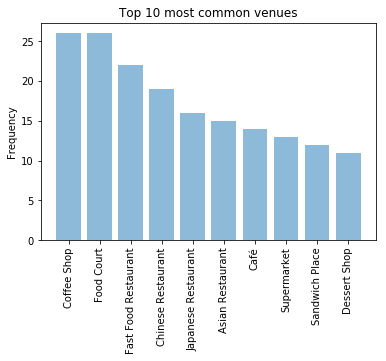

In [13]:
SG_venues.shape
SG_Venue_freq=SG_venues.groupby(['Venue Category']).count().sort_values(by='Area', ascending=False)
SG_Venue_freq.drop(columns={'Area Latitude','Area Longitude','Venue Latitude','Venue Longitude','Area'},axis=1,inplace=True)
SG_Venue_freq.rename(columns={'Venue':'Frequency'},inplace=True)
SG_Venue_freq_b=SG_Venue_freq.head(10)
SG_Venue_freq_b.reset_index(inplace=True)
x_pos=np.arange(10)
plt.bar(x_pos,SG_Venue_freq_b['Frequency'],align='center', alpha=0.5)
Xticks=list(SG_Venue_freq_b.iloc[:,0])
plt.xticks(x_pos,Xticks, rotation='vertical')
plt.ylabel('Frequency')
plt.title('Top 10 most common venues')
plt.show()

In [14]:
# one hot encoding
SG_onehot = pd.get_dummies(SG_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
SG_onehot['Area'] = SG_venues['Area'] 

# move neighborhood column to the first column
fixed_columns = [SG_onehot.columns[-1]] + list(SG_onehot.columns[:-1])
SG_onehot = SG_onehot[fixed_columns]

SG_onehot.head()

SG_grouped = SG_onehot.groupby('Area').mean().reset_index()
SG_grouped

,Area,American Restaurant,Arcade,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bank,Bookstore,Boutique,...,Sushi Restaurant,Szechuan Restaurant,Tailor Shop,Tea Room,Thai Restaurant,Thrift / Vintage Store,Toy / Game Store,Vegetarian / Vegan Restaurant,Video Game Store,Wings Joint
0,Ang Mo Kio,0.000000,0.000000,0.021277,0.000000,0.000000,0.021277,0.021277,0.000000,0.000000,...,0.021277,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.021277,0.000000,0.000000
1,Bedok,0.017544,0.000000,0.035088,0.000000,0.000000,0.017544,0.000000,0.017544,0.000000,...,0.035088,0.000000,0.000000,0.000000,0.000000,0.017544,0.000000,0.017544,0.000000,0.017544
2,Choa Chu Kang,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,0.000000
3,Hougang,0.000000,0.000000,0.043478,0.043478,0.043478,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,0.000000
4,Jurong West,0.015873,0.000000,0.095238,0.000000,0.015873,0.000000,0.000000,0.015873,0.015873,...,0.015873,0.000000,0.000000,0.000000,0.015873,0.000000,0.000000,0.000000,0.000000,0.015873
5,Punggol,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Sengkang,0.000000,0.000000,0.034483,0.000000,0.000000,0.034483,0.000000,0.000000,0.000000,...,0.034483,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Tampines,0.012346,0.000000,0.037037,0.000000,0.000000,0.049383,0.000000,0.012346,0.000000,...,0.037037,0.000000,0.000000,0.000000,0.024691,0.000000,0.012346,0.000000,0.000000,0.000000
8,Woodlands,0.000000,0.022727,0.000000,0.000000,0.000000,0.000000,0.000000,0.022727,0.000000,...,0.022727,0.022727,0.022727,0.022727,0.000000,0.000000,0.000000,0.000000,0.022727,0.000000
9,Yishun,0.000000,0.020833,0.000000,0.000000,0.000000,0.000000,0.000000,0.020833,0.000000,...,0.020833,0.020833,0.020833,0.020833,0.000000,0.000000,0.000000,0.000000,0.020833,0.000000


Finding the 5 most common venues in all the 10 areas 

In [15]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Area']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
SG_venues_sorted = pd.DataFrame(columns=columns)
SG_venues_sorted['Area'] = SG_grouped['Area']

for ind in np.arange(SG_grouped.shape[0]):
    SG_venues_sorted.iloc[ind, 1:] = return_most_common_venues(SG_grouped.iloc[ind, :], num_top_venues)

SG_venues_sorted.head(10)

,Area,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,Ang Mo Kio,Coffee Shop,Food Court,Bubble Tea Shop,Dessert Shop,Sandwich Place
1,Bedok,Coffee Shop,Sandwich Place,Food Court,Japanese Restaurant,Sushi Restaurant
2,Choa Chu Kang,Fast Food Restaurant,Gym,Coffee Shop,Pharmacy,Sandwich Place
3,Hougang,Food Court,Coffee Shop,Steakhouse,Indian Restaurant,Breakfast Spot
4,Jurong West,Japanese Restaurant,Asian Restaurant,Fast Food Restaurant,Café,Chinese Restaurant
5,Punggol,Bus Station,High School,Chinese Restaurant,Movie Theater,Supermarket
6,Sengkang,Coffee Shop,Fast Food Restaurant,Food Court,Bus Station,Chinese Restaurant
7,Tampines,Bakery,Café,Coffee Shop,Japanese Restaurant,Gym
8,Woodlands,Chinese Restaurant,Food Court,Hainan Restaurant,Coffee Shop,Italian Restaurant
9,Yishun,Chinese Restaurant,Food Court,Coffee Shop,Hainan Restaurant,Park


Setting up K-Means Clustering

In [17]:
# set number of clusters
kclusters = 11
K = range(1,kclusters)
SG_grouped_clustering = SG_grouped.drop('Area', 1)

sum_of_squared_distances=[]

for k in K:
# run k-means clustering
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans_fit=kmeans.fit(SG_grouped_clustering)
    sum_of_squared_distances.append(kmeans_fit.inertia_)

Finding the optimum number of clusters using the Elbow method.

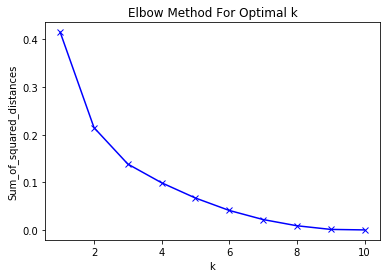

In [18]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


From the above plot we can see that the elbow is somewhere at 3 or 4. For our analysis we'll choose 4.

In [19]:
#SG_venues_sorted.drop(columns={'Cluster Labels'}, axis=1, inplace=True)
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans_fit=kmeans.fit(SG_grouped_clustering)
print(kmeans_fit.labels_[0:10])

# add clustering labels
SG_venues_sorted.insert(0, 'Cluster Labels', kmeans_fit.labels_)

SG_merged = area_table

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
SG_merged = SG_merged.join(SG_venues_sorted.set_index('Area'), on='Area_Name')


SG_merged # check the last columns!

[2 2 3 0 2 1 2 2 2 2]


,Area_Name,Region,Area,Population,Area_lat,Area_lon,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
1,Bedok,East,21.69,281300.0,1.323976,103.930216,2,Coffee Shop,Sandwich Place,Food Court,Japanese Restaurant,Sushi Restaurant
17,Jurong West,West,14.69,266720.0,1.339636,103.707339,2,Japanese Restaurant,Asian Restaurant,Fast Food Restaurant,Café,Chinese Restaurant
46,Tampines,East,20.89,257110.0,1.354653,103.943571,2,Bakery,Café,Coffee Shop,Japanese Restaurant,Gym
53,Woodlands,North,13.59,252530.0,1.430400,103.835400,2,Chinese Restaurant,Food Court,Hainan Restaurant,Coffee Shop,Italian Restaurant
39,Sengkang,North-East,10.59,240640.0,1.390949,103.895175,2,Coffee Shop,Fast Food Restaurant,Food Court,Bus Station,Chinese Restaurant
15,Hougang,North-East,13.93,223010.0,1.373360,103.886091,0,Food Court,Coffee Shop,Steakhouse,Indian Restaurant,Breakfast Spot
54,Yishun,North,21.24,214940.0,1.428136,103.833694,2,Chinese Restaurant,Food Court,Coffee Shop,Hainan Restaurant,Park
11,Choa Chu Kang,West,6.11,187510.0,1.389260,103.743728,3,Fast Food Restaurant,Gym,Coffee Shop,Pharmacy,Sandwich Place
0,Ang Mo Kio,North-East,13.94,165710.0,1.369842,103.846609,2,Coffee Shop,Food Court,Bubble Tea Shop,Dessert Shop,Sandwich Place
33,Punggol,North-East,9.34,161570.0,1.398033,103.907331,1,Bus Station,High School,Chinese Restaurant,Movie Theater,Supermarket


Plotting the clusters on Singapore map.

In [35]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
kclusters=4
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, 12))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(SG_merged['Area_lat'], SG_merged['Area_lon'], SG_merged['Area_Name'], SG_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    if (cluster!=cluster)==False:
        {
        folium.CircleMarker(
        [lat, lon],
        radius=15,
        popup=label,
        color=rainbow[int(2*cluster)-1],
        fill=True,
        fill_color=rainbow[int(2*cluster)-1],
        fill_opacity=0.9).add_to(map_clusters)
}   
           
map_clusters